<a href="https://colab.research.google.com/github/OctaviaCosby/CNNandMLPComparison/blob/main/Age_and_Gender_CNN_MLP_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import the libraries
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torchvision.transforms import v2, InterpolationMode
import os
from sklearn.model_selection import train_test_split
import matplotlib.image as image
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
#upload the zipped file part3 and unzip it
!tar -xf part3.tar.gz
%ls
data_path = 'part3'
print(os.listdir(data_path))

part3/  part3.tar.gz  sample_data/
['35_0_3_20170119181247523.jpg', '18_0_3_20170119151213151.jpg', '49_0_3_20170119201611413.jpg', '50_0_3_20170119211600321.jpg', '47_0_3_20170119201921580.jpg', '55_0_3_20170119205329112.jpg', '50_0_3_20170119183204846.jpg', '30_0_0_20170119195539771.jpg', '36_0_0_20170119201626207.jpg', '40_0_3_20170119154448251.jpg', '26_1_3_20170119192313426.jpg', '52_0_3_20170119204331863.jpg', '61_0_3_20170119211852753.jpg', '58_0_3_20170119211548329.jpg', '29_1_3_20170119195530916.jpg', '28_1_3_20170119195103018.jpg', '50_1_0_20170120222828266.jpg', '43_0_3_20170119200911708.jpg', '37_0_3_20170119193226433.jpg', '26_0_0_20170120140714337.jpg', '46_0_3_20170119195012113.jpg', '58_0_0_20170117153829116.jpg', '55_0_3_20170119211431441.jpg', '40_1_3_20170119183059633.jpg', '26_0_3_20170119181609780.jpg', '24_1_0_20170116222936821.jpg', '22_1_3_20170119163028157.jpg', '28_1_0_20170117003302256.jpg', '22_0_3_20170119160301570.jpg', '50_0_3_20170119204347415.jpg', '28_

In [ ]:
#define the transformation
transform = v2.Compose([
    v2.Resize((50, 50)),
    v2.ToTensor()
])

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/v2/_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(


In [ ]:
images=[]
Ages=[]
Genders=[]
Ethnicities=[]
for filename in os.listdir(data_path):
    parts=filename.split('_')
    if len(parts)!=4:
        continue
    age,gender,ethnicity,_=filename.split('_')
    #print the data
    print(age)
    print(gender)
    print(ethnicity)
    #append the features
    Ages.append(int(age))
    Genders.append(int(gender))
    Ethnicities.append(int(ethnicity))
    img_path=os.path.join(data_path,filename)
    #read the image
    image=Image.open(img_path).convert('RGB') # read image
    image=transform(image)
    images.append(image)


Streaming output truncated to the last 5000 lines.
0
3
63
0
3
28
0
3
61
0
3
31
1
3
56
1
3
26
0
3
55
0
0
50
0
3
34
0
3
40
0
0
44
0
3
81
1
0
36
0
3
43
1
3
15
0
1
28
0
3
26
1
1
29
1
1
27
0
3
26
1
3
45
0
3
36
0
3
73
0
3
26
0
1
27
0
3
24
0
3
42
1
1
50
0
3
58
0
3
26
1
0
40
0
3
26
0
3
26
0
3
80
1
2
63
0
3
23
0
0
45
1
3
61
0
3
43
0
3
42
1
0
50
0
3
20
1
0
22
1
0
64
0
0
35
0
2
26
0
3
58
0
3
36
0
0
37
0
3
62
0
0
100
1
0
26
0
3
58
0
0
33
1
3
52
0
3
67
0
0
26
1
3
26
0
3
81
1
0
26
1
3
37
1
0
50
0
3
24
1
3
70
1
0
22
1
3
65
0
0
32
0
3
18
1
3
24
0
1
34
0
3
60
0
1
26
0
3
65
0
1
27
0
1
40
0
3
27
0
3
26
1
1
56
1
0
42
1
3
20
0
1
28
0
3
70
0
1
31
0
4
25
1
3
44
0
3
52
0
3
54
0
0
90
0
0
31
1
1
38
0
3
36
0
3
45
0
3
47
0
3
57
0
3
75
1
0
26
0
3
36
0
3
55
0
3
49
0
1
30
0
0
25
0
3
87
0
0
50
0
3
26
0
3
36
0
3
37
0
3
38
0
3
89
1
0
25
0
2
54
0
3
43
1
0
33
0
3
22
1
3
40
0
3
39
0
3
40
0
3
28
0
3
75
1
0
50
0
3
25
0
3
15
1
3
25
1
3
99
1
0
55
0
3
26
0
3
25
1
0
45
0
3
78
0
0
25
1
3
45
0
3
78
0
0
28
0
3
19
0
3
37
0
0
50
0
3

####Part 1: Data Preprocessing

In [ ]:
#convert all the lists to tensor
images = torch.stack(images)
Ages = torch.tensor(Ages, dtype=torch.float32)
Genders = torch.tensor(Genders, dtype=torch.float32)
Ethnicities = torch.tensor(Ethnicities, dtype=torch.float32)

In [ ]:
#split the data to tain and test yp 70% training, 15% validation, and 15% test
X_temp, X_test, y_temp, y_test =train_test_split(images, Genders, test_size=0.1)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1765)

#wrap the datasets into the dataloader
train_dataset = TensorDataset(X_train, y_train)
val_dataset= TensorDataset(X_val, y_val)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle = True)
val_loader = DataLoader(val_dataset, batch_size = 32, shuffle = False)
test_loader = DataLoader(test_dataset, batch_size = 32, shuffle=False)

#show the datasets
print(f"Training Samples: {len(train_dataset)}")
print(f"Validation Samples: {len(val_dataset)}")
print(f"Testing Samples: {len(test_dataset)}")

Training Samples: 2409
Validation Samples: 517
Testing Samples: 326


####Part 2: Exploratory Data Analysis

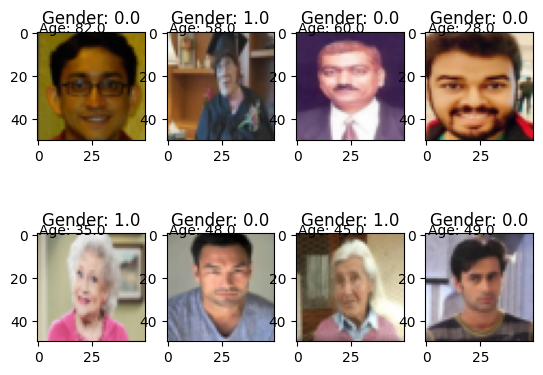

In [ ]:
# testing to make sure the data was read correctly
# printing out 8 images w/ labels
fig, axes = plt.subplots(2, 4)
# select the indices within the dataset length
indices = np.random.choice(len(train_dataset), 10)
for i, axes in enumerate(axes.flat):
    idx = indices[i]
    #get the data and label from train_dataset directly
    x, label = train_dataset[idx]
    # Change the order of dimensions to (50, 50, 3)
    image = x.permute(1, 2, 0)
    axes.imshow(image)
    axes.set_title(f'Gender: {label}')

    age = Ages[idx]
    axes.text(0.5, -0.1, f"Age: {age}")

plt.show()

### Discuss Biases in Dataset

Discuss any potential biases in the dataset and how they might affect model performance:

**A few biases to be noted within viewing the dataset would be age and gender detection. If the subject in the photo is old it may be harder for the models to differenciate between sex.**

**Also, men with no facial hair and more feminine features are likely to be listed as the opposite sex. While also being labeled as younger than their actual age.**

**Glasses and facial hair may trick the model into categorizing people in higher age group.**



#### Part 3:Model Training


In [ ]:
#build the CNN model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.shared_layers = nn.Sequential(
            nn.Conv2d(3, 8, 3, padding=1),  # output 50x50x8
            nn.ReLU(),  # output 50x50x8
            nn.MaxPool2d(2),  # output 25x25x8

            nn.Conv2d(8, 16, 3, padding=1),  # output 25x25x16
            nn.ReLU(),  # output 25x25x16
            nn.MaxPool2d(2),  # 12x12x16

            nn.Conv2d(16, 64, 3, padding=1),  # output 12x12x64
            nn.ReLU(),  # output 12x12x64
            nn.MaxPool2d(2),  # output 6x6x64

            nn.Conv2d(64, 128, 3, padding=1),  # output 6x6x128
            nn.ReLU(),  # output 6x6x128
            nn.MaxPool2d(2),  # output 3x3x128
            nn.Flatten(),

        )
        self.age_head = nn.Sequential(
            nn.Linear(1152, 50),
            nn.ReLU(),
            nn.Linear(50, 1)
        )
        self.gender_head = nn.Sequential(
            nn.Linear(1152, 50),
            nn.ReLU(),
            nn.Linear(50, 1),
            nn.Sigmoid()
        )

    def forward(self, X):
        features = self.shared_layers(X)
        age_output = self.age_head(features)
        gender_output = self.gender_head(features)
        return age_output, gender_output
# start the model
cnn_model = CNN()

In [ ]:
#define loss function and MSE
age_loss_fn = nn.MSELoss()
gender_loss_fn = nn.BCELoss()
optimizer = optim.Adam(cnn_model.parameters(), lr = 0.001)

In [ ]:
#create a datalodaer for the training and testing data
batch_size = 8
optimizer = optim.Adam(cnn_model.parameters(), lr = 0.001)

In [ ]:
#create a training and tesing dataset
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

#assign and create loaded dataset
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle = False)

In [ ]:
#make the training loop
num_epochs = 100

#nested for loop
for epoch in range(num_epochs):
  #set the model to training mode
  cnn_model.train()
  running_loss = 0.0

  #for loop to reset gradients
  for inputs, labels in train_loader:
    optimizer.zero_grad()

    age_output, gender_output = cnn_model(inputs)

    if labels.dim() > 1 and labels.shape[1] == 2:
        age_labels = labels[:, 0]
        gender_labels = labels[:, 1]
    else:
        age_labels = labels.squeeze(0)
        gender_labels = age_labels

    age_output = age_output.view(-1)
    age_labels = age_labels.view(-1)

    gender_output = gender_output.view(-1)
    # use the assigned gender_labels
    gender_labels = gender_labels.view(-1)

    #calculate the loss of age and gender
    age_loss = age_loss_fn(age_output, age_labels)
    gender_loss = gender_loss_fn(gender_output, gender_labels)

    #combine the losses
    total_loss = age_loss + gender_loss

    #using backward pass and optimization
    total_loss.backward()
    optimizer.step()

    running_loss += total_loss.item()
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader):.4f}")
    print(f"Total Loss: {total_loss.item()}")

Streaming output truncated to the last 5000 lines.
Epoch 92/100, Loss: 0.0076
Total Loss: 0.022122826427221298
Epoch 92/100, Loss: 0.0077
Total Loss: 0.01378822885453701
Epoch 92/100, Loss: 0.0077
Total Loss: 0.009549766778945923
Epoch 92/100, Loss: 0.0077
Total Loss: 0.0003673825995065272
Epoch 92/100, Loss: 0.0077
Total Loss: 0.008956843987107277
Epoch 92/100, Loss: 0.0077
Total Loss: 0.001918500172905624
Epoch 92/100, Loss: 0.0077
Total Loss: 0.008228248916566372
Epoch 92/100, Loss: 0.0078
Total Loss: 0.004170811269432306
Epoch 92/100, Loss: 0.0078
Total Loss: 0.005026442464441061
Epoch 92/100, Loss: 0.0078
Total Loss: 0.004206712357699871
Epoch 92/100, Loss: 0.0078
Total Loss: 0.000965167477261275
Epoch 92/100, Loss: 0.0078
Total Loss: 0.000612076255492866
Epoch 92/100, Loss: 0.0078
Total Loss: 0.0032285305205732584
Epoch 92/100, Loss: 0.0078
Total Loss: 0.001098952954635024
Epoch 92/100, Loss: 0.0078
Total Loss: 0.0017681724857538939
Epoch 92/100, Loss: 0.0078
Total Loss: 0.001953

#### Part 3.2: MLP

In [ ]:
#create class for MLP model
class MLP(nn.Module):
  def __init__ (self, input_size):
    super(MLP, self).__init__()
    self.shared_layers = nn.Sequential(
        nn.Linear(input_size, 512),
        nn.ReLU(),
        nn.Dropout(0.3),
        nn.Linear(512, 256),
        nn.ReLU(),
        nn.Dropout(0.3)
    )
    self.age_head = nn.Sequential(
        nn.Linear(256, 1),
    )
    self.gender_head = nn.Sequential(
        nn.Linear(256, 1),
        nn.Sigmoid()
    )
  def forward(self, x):
    x = x.view(x.size(0), -1)
    shared_features = self.shared_layers(x)
    age_output = self.age_head(shared_features)
    gender_output = self.gender_head(shared_features)
    return age_output, gender_output

input_size = 3*50*50
mlp_model = MLP(input_size)

In [ ]:
#make the training loop
num_epochs = 100

#nested for loop
for epoch in range(num_epochs):
  #set the model to training mode
  mlp_model.train()
  running_loss = 0.0

  #for loop to reset gradients
  for inputs, labels in train_loader:
    optimizer.zero_grad()

    age_output, gender_output = mlp_model(inputs)

    if labels.dim() > 1 and labels.shape[1] == 2:
        age_labels = labels[:, 0]
        gender_labels = labels[:, 1]
    else:
        age_labels = labels.squeeze(0)
        gender_labels = age_labels

    age_output = age_output.view(-1)
    age_labels = age_labels.view(-1)

    gender_output = gender_output.view(-1)
    # use the assigned gender_labels
    gender_labels = gender_labels.view(-1)

    #calculate the loss of age and gender
    age_loss = age_loss_fn(age_output, age_labels)
    gender_loss = gender_loss_fn(gender_output, gender_labels)

    #combine the losses
    total_loss = age_loss + gender_loss

    #using backward pass and optimization
    total_loss.backward()
    optimizer.step()

    running_loss += total_loss.item()
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader):.4f}")
    print(f"Total Loss: {total_loss.item()}")

Streaming output truncated to the last 5000 lines.
Epoch 92/100, Loss: 0.7223
Total Loss: 1.0076650381088257
Epoch 92/100, Loss: 0.7256
Total Loss: 0.9999876022338867
Epoch 92/100, Loss: 0.7291
Total Loss: 1.0513312816619873
Epoch 92/100, Loss: 0.7318
Total Loss: 0.8170185089111328
Epoch 92/100, Loss: 0.7354
Total Loss: 1.0897324085235596
Epoch 92/100, Loss: 0.7395
Total Loss: 1.2290678024291992
Epoch 92/100, Loss: 0.7422
Total Loss: 0.8282020688056946
Epoch 92/100, Loss: 0.7465
Total Loss: 1.282867193222046
Epoch 92/100, Loss: 0.7500
Total Loss: 1.0561422109603882
Epoch 92/100, Loss: 0.7537
Total Loss: 1.1127886772155762
Epoch 92/100, Loss: 0.7568
Total Loss: 0.947701632976532
Epoch 92/100, Loss: 0.7600
Total Loss: 0.9640512466430664
Epoch 92/100, Loss: 0.7631
Total Loss: 0.9499763250350952
Epoch 92/100, Loss: 0.7656
Total Loss: 0.7419134974479675
Epoch 92/100, Loss: 0.7683
Total Loss: 0.8209400773048401
Epoch 92/100, Loss: 0.7711
Total Loss: 0.8452939987182617
Epoch 92/100, Loss: 0.7

In [ ]:
#define loss function and MSE
age_loss_fn = nn.MSELoss()
gender_loss_fn = nn.BCELoss()
optimizer = optim.Adam(mlp_model.parameters(), lr = 0.001)

In [ ]:
#create a datalodaer for the training and testing data
batch_size = 8
optimizer = optim.Adam(mlp_model.parameters(), lr = 0.001)

#### Part 4: Model Comparison

**When the CNN model ran, the estimated runtime for 100 epoch was approximately 8 minutes and 10 seconds. The total loss reached no higher than approximately 0.0035.**

**While the MLP model ran 100 with an estimated runtime at 4 minutes and 44 seconds with the total loss reaching no higher than approximately 1.788**

#### Part 5: CNN Model Evaluation

In [ ]:
#last testing phase
#set the model to evaluation mode
cnn_model.eval()
test_loss = 0.0
correct = 0
total = 0

with torch.no_grad():
  for inputs, labels in test_loader:

                   age_output, gender_output = cnn_model(inputs)
                   outputs = age_output.view(-1)
                   labels = labels.view(-1)

                   outputs = torch.sigmoid(outputs)

                   Lossfn = nn.BCELoss()

                   #calculate the test loss
                   loss = Lossfn(outputs, labels)
                   test_loss += loss.item()

                   #calculate the accuracy
                   #convert the output to binary predictions
                   predictions = (outputs > 0.5).float()
                   correct += (predictions == labels).sum().item()
                   total += labels.size(0)

test_accuracy = 100 * correct / total
print(f"CNN Test Loss: {test_loss/len(test_loader):.4f}")
print(f"CNN Test Accuracy: {test_accuracy:.2f}%")

CNN Test Loss: 0.6548
CNN Test Accuracy: 52.76%


####Part 5: MLP Model Evaluation

In [ ]:
#last testing phase
#set the model to evaluation mode
mlp_model.eval()
test_loss = 0.0
correct = 0
total = 0

with torch.no_grad():
  for inputs, labels in test_loader:
                   # Model returns age and gender outputs as a tuple
                   age_output, gender_output = mlp_model(inputs)
                   # Assuming you want to evaluate age, adjust as needed
                   outputs = age_output.view(-1)  # Use age_output
                   labels = labels.view(-1)

                   # Apply sigmoid activation to get probabilities
                   outputs = torch.sigmoid(outputs) #this line changed to ensure the output is in the range of 0 and 1

                   #calculate the test loss
                   loss = Lossfn(outputs, labels)
                   test_loss += loss.item()

                   #calculate the accuracy
                   #convert the output to binary predictions
                   predictions = (outputs > 0.5).float()
                   correct += (predictions == labels).sum().item()
                   total += labels.size(0)

test_accuracy = 100 * correct / total
print(f"MLP Test Loss: {test_loss/len(test_loader):.4f}")
print(f"MLP Test Accuracy: {test_accuracy:.2f}%")

MLP Test Loss: 0.6923
MLP Test Accuracy: 52.76%


####Part 5:Plot Epochs

Epoch 1/100, Train Loss: 0.0042, Val Loss: 1.7540
Train Accuracy: 99.83%, Val Accuracy: 77.56%
Epoch 2/100, Train Loss: 0.0042, Val Loss: 1.7540
Train Accuracy: 99.83%, Val Accuracy: 77.56%
Epoch 3/100, Train Loss: 0.0042, Val Loss: 1.7540
Train Accuracy: 99.83%, Val Accuracy: 77.56%
Epoch 4/100, Train Loss: 0.0042, Val Loss: 1.7540
Train Accuracy: 99.83%, Val Accuracy: 77.56%
Epoch 5/100, Train Loss: 0.0042, Val Loss: 1.7540
Train Accuracy: 99.83%, Val Accuracy: 77.56%
Epoch 6/100, Train Loss: 0.0042, Val Loss: 1.7540
Train Accuracy: 99.83%, Val Accuracy: 77.56%
Epoch 7/100, Train Loss: 0.0042, Val Loss: 1.7540
Train Accuracy: 99.83%, Val Accuracy: 77.56%
Epoch 8/100, Train Loss: 0.0042, Val Loss: 1.7540
Train Accuracy: 99.83%, Val Accuracy: 77.56%
Epoch 9/100, Train Loss: 0.0042, Val Loss: 1.7540
Train Accuracy: 99.83%, Val Accuracy: 77.56%
Epoch 10/100, Train Loss: 0.0042, Val Loss: 1.7540
Train Accuracy: 99.83%, Val Accuracy: 77.56%
Epoch 11/100, Train Loss: 0.0042, Val Loss: 1.754

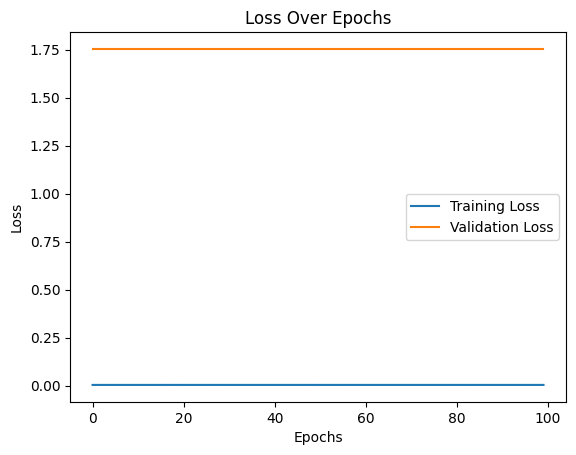

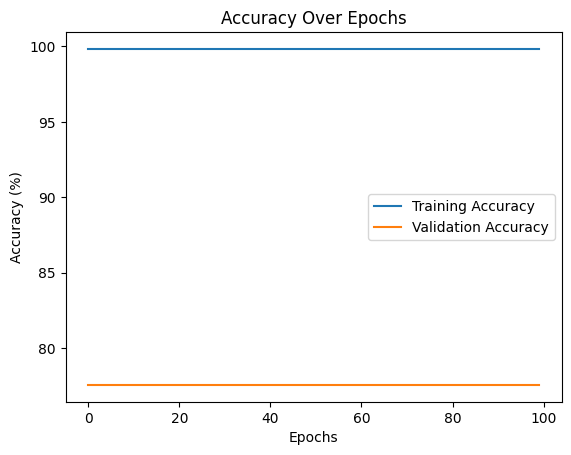

In [ ]:
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

for epoch in range(num_epochs):
    cnn_model.train()
    running_loss = 0.0
    correct_train, total_train = 0, 0

    for inputs, labels in train_loader:
        optimizer.zero_grad()

        age_output, gender_output = cnn_model(inputs)
        age_labels = labels
        gender_labels = labels

        age_loss = age_loss_fn(age_output.view(-1), age_labels.view(-1))
        gender_loss = gender_loss_fn(gender_output.view(-1), gender_labels.view(-1))
        total_loss = age_loss + gender_loss
        total_loss.backward()
        optimizer.step()

        running_loss += total_loss.item()
        predictions = (gender_output.view(-1) > 0.5).float()
        correct_train += (predictions == gender_labels).sum().item()
        total_train += gender_labels.size(0)

    train_loss = running_loss / len(train_loader)
    train_accuracy = 100 * correct_train / total_train
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    # Validation phase
    cnn_model.eval()
    val_loss, correct_val, total_val = 0.0, 0, 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            age_output, gender_output = cnn_model(inputs)
            age_labels = labels
            gender_labels = labels

            age_loss = age_loss_fn(age_output.view(-1), age_labels.view(-1))
            gender_loss = gender_loss_fn(gender_output.view(-1), gender_labels.view(-1))
            total_loss = age_loss + gender_loss
            val_loss += total_loss.item()

            predictions = (gender_output.view(-1) > 0.5).float()
            correct_val += (predictions == gender_labels).sum().item()
            total_val += gender_labels.size(0)

    val_losses.append(val_loss / len(val_loader))
    val_accuracies.append(100 * correct_val / total_val)

    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_losses[-1]:.4f}")
    print(f"Train Accuracy: {train_accuracy:.2f}%, Val Accuracy: {val_accuracies[-1]:.2f}%")

# Plot training and validation loss
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss Over Epochs")
plt.show()

# Plot training and validation accuracy
plt.plot(train_accuracies, label="Training Accuracy")
plt.plot(val_accuracies, label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.title("Accuracy Over Epochs")
plt.show()

####MLP Epoch Graphs

Epoch 1/100, Train Loss: 0.9487, Val Loss: 1.7540
Train Accuracy: 69.07%, Val Accuracy: 77.56%
Epoch 2/100, Train Loss: 0.8201, Val Loss: 1.7540
Train Accuracy: 70.36%, Val Accuracy: 77.56%
Epoch 3/100, Train Loss: 0.8004, Val Loss: 1.7540
Train Accuracy: 70.11%, Val Accuracy: 77.56%
Epoch 4/100, Train Loss: 0.8216, Val Loss: 1.7540
Train Accuracy: 70.11%, Val Accuracy: 77.56%
Epoch 5/100, Train Loss: 0.8185, Val Loss: 1.7540
Train Accuracy: 70.15%, Val Accuracy: 77.56%
Epoch 6/100, Train Loss: 0.8195, Val Loss: 1.7540
Train Accuracy: 70.11%, Val Accuracy: 77.56%
Epoch 7/100, Train Loss: 0.8211, Val Loss: 1.7540
Train Accuracy: 70.11%, Val Accuracy: 77.56%
Epoch 8/100, Train Loss: 0.8207, Val Loss: 1.7540
Train Accuracy: 70.11%, Val Accuracy: 77.56%
Epoch 9/100, Train Loss: 0.8211, Val Loss: 1.7540
Train Accuracy: 70.11%, Val Accuracy: 77.56%
Epoch 10/100, Train Loss: 0.8208, Val Loss: 1.7540
Train Accuracy: 70.11%, Val Accuracy: 77.56%
Epoch 11/100, Train Loss: 0.8212, Val Loss: 1.754

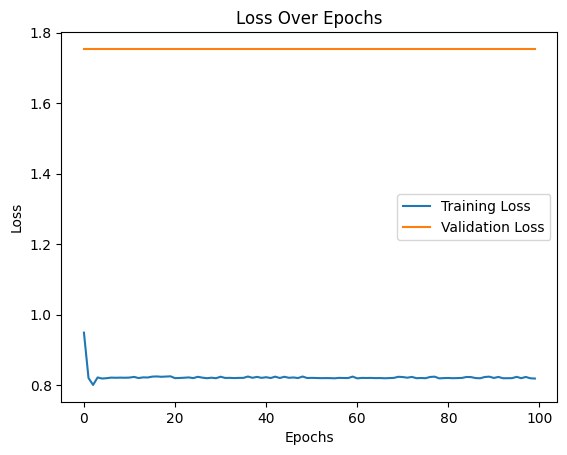

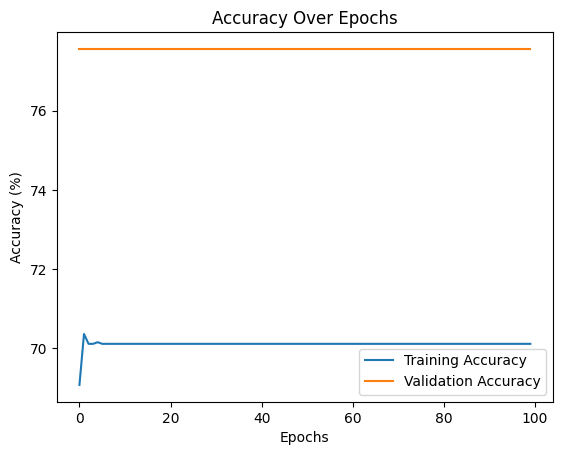

In [ ]:
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

for epoch in range(num_epochs):
    mlp_model.train()
    running_loss = 0.0
    correct_train, total_train = 0, 0

    for inputs, labels in train_loader:
        optimizer.zero_grad()

        age_output, gender_output = mlp_model(inputs)
        age_labels = labels
        gender_labels = labels

        age_loss = age_loss_fn(age_output.view(-1), age_labels.view(-1))
        gender_loss = gender_loss_fn(gender_output.view(-1), gender_labels.view(-1))
        total_loss = age_loss + gender_loss
        total_loss.backward()
        optimizer.step()

        running_loss += total_loss.item()
        predictions = (gender_output.view(-1) > 0.5).float()
        correct_train += (predictions == gender_labels).sum().item()
        total_train += gender_labels.size(0)

    train_loss = running_loss / len(train_loader)
    train_accuracy = 100 * correct_train / total_train
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    # Validation phase
    mlp_model.eval()
    val_loss, correct_val, total_val = 0.0, 0, 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            age_output, gender_output = cnn_model(inputs)
            age_labels = labels
            gender_labels = labels

            age_loss = age_loss_fn(age_output.view(-1), age_labels.view(-1))
            gender_loss = gender_loss_fn(gender_output.view(-1), gender_labels.view(-1))
            total_loss = age_loss + gender_loss
            val_loss += total_loss.item()

            predictions = (gender_output.view(-1) > 0.5).float()
            correct_val += (predictions == gender_labels).sum().item()
            total_val += gender_labels.size(0)

    val_losses.append(val_loss / len(val_loader))
    val_accuracies.append(100 * correct_val / total_val)

    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_losses[-1]:.4f}")
    print(f"Train Accuracy: {train_accuracy:.2f}%, Val Accuracy: {val_accuracies[-1]:.2f}%")

# Plot training and validation loss
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss Over Epochs")
plt.show()

# Plot training and validation accuracy
plt.plot(train_accuracies, label="Training Accuracy")
plt.plot(val_accuracies, label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.title("Accuracy Over Epochs")
plt.show()

Part 5: MLP Model Evaluation

CNN Test Loss: 0.6548
CNN Test Accuracy: 52.76%


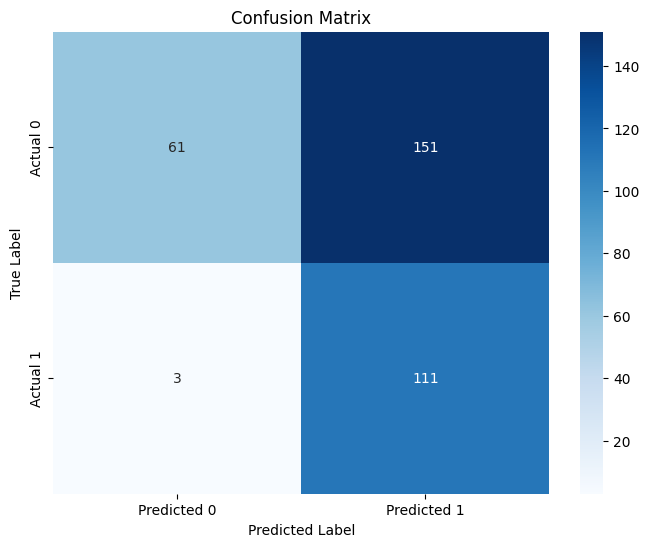

In [ ]:
print(f"CNN Test Loss: {test_loss/len(test_loader):.4f}")
print(f"CNN Test Accuracy: {test_accuracy:.2f}%")

# Create confusion matrix
conf_matrix = confusion_matrix(all_labels, all_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Discuss the overall performance of the models and potential improvements:

**Overall, the perfomances of the models aren't the best even though one model does perfrom bettern than the other. The run time for MLP with the plot took 47 minutes and 44 seconds, the model can benefit from a reduction in testing/ training data to help increase runtime. While the CNN model in the instance of plotting epochs ran faster for some reason. My assumpution would be because the model is more simplistic and doesn't require much cpu to process.**